### import libraries/modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

### load the dataset

In [2]:
train = pd.read_csv("Train.csv")

In [3]:
train.head()

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence


In [4]:
test = pd.read_csv("Test.csv")

In [5]:
test.head()

,Tweet_ID,tweet
0,ID_0095QL4S,"because he was my boyfriend, and if I said no,..."
1,ID_00DREW5O,"lol no, I'm telling you it's not legal. It's l..."
2,ID_00E9F5X9,Somalia's semi-autonomous Puntland region has ...
3,ID_00G9OSKZ,University of Cape Coast students being robbed...
4,ID_00HU96U6,"""Somebody came up behind him and stabbed him i..."


### EDA

In [6]:
train.shape # the training dataset has 39650 rows

(39650, 3)

In [7]:
train["type"].unique()

array(['sexual_violence', 'Physical_violence', 'emotional_violence',
       'Harmful_Traditional_practice', 'economic_violence'], dtype=object)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='type', ylabel='count'>

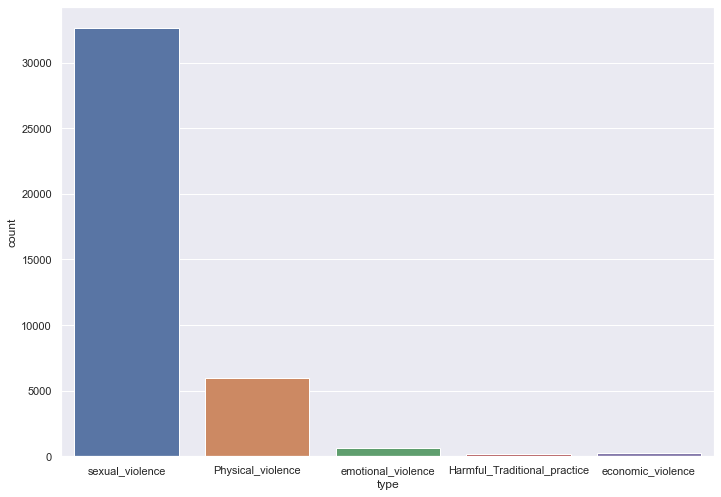

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.countplot(train["type"])

This dataset is highly imbalanced; from the graphs above, sexual violence is about 80%+. 

In [9]:
test.shape # the test dataset has 15581 rows

(15581, 2)

### Create models

Before we develop our models, we can set aside some validation dataset for inference purposes. We'll use scikit learn train test split module.https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [10]:
X = train.drop(["type"], axis=1)
y = train["type"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

CountVectorizer -converts text files/data into numerical feature vectors. You can find more information on CountVectorizer  here  https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [12]:
vectorizer = CountVectorizer()

# fit_transform our tweets values to numerical vectors
x_train_counts = vectorizer.fit_transform(X_train["tweet"])
x_train_counts

<26565x30352 sparse matrix of type '<class 'numpy.int64'>'
	with 824624 stored elements in Compressed Sparse Row format>

Using the CountVectorizer is effective, but this might give more preference to longer tweets than others. Let's try using frequencies. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html

In [13]:
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
x_train_tfidf.shape

(26565, 30352)

Multiple algorithms are used for text classification; let’s look at:-

### 1. Naive Bayes MultinomialNB https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [14]:
# train.type.values our y values
clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                  ('clf', MultinomialNB())])
clf = clf.fit(X_train["tweet"], y_train)

### evaluation metric
The evaluation metric on the Zindi leaderboard is accuracy; let’s test our simple model,

In [15]:
predicted = clf.predict(X_test.tweet)

In [16]:
predicted

array(['sexual_violence', 'sexual_violence', 'sexual_violence', ...,
       'sexual_violence', 'sexual_violence', 'sexual_violence'],
      dtype='<U28')

In [17]:
np.unique(predicted)

array(['Physical_violence', 'emotional_violence', 'sexual_violence'],
      dtype='<U28')

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predicted)

0.8871226595338173

- Our simple model gave us an accuracy score of 88%, fair enough, but you should also be careful that the data is highly imbalanced, as discussed earlier. 

- Question? Is the imbalance percentage the same as in the test? Can you think of various ways to deal with the imbalance dataset

- We can also see the only 3 categories(i.e 'Physical_violence', 'emotional_violence', 'sexual_violence') were predicted yet we have 5 categories. Therefore 88% might not be that good.


### submission

In [22]:
sample_submission = pd.read_csv("SampleSubmission.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Sample_submission.csv'

In [ ]:
sample_submission.head()

NameError: name 'sample_submission' is not defined

In [ ]:
##let's prdict on the test data
test_predict = clf.predict(test.tweet)

In [ ]:
test_predict

array(['sexual_violence', 'sexual_violence', 'sexual_violence', ...,
       'sexual_violence', 'sexual_violence', 'sexual_violence'],
      dtype='<U28')

In [ ]:
np.unique(test_predict)

array(['Physical_violence', 'sexual_violence'], dtype='<U28')

In [ ]:
sample_submission["type"] = test_predict

In [ ]:
sample_submission.to_csv('baseline_sub.csv', index=False)

### To do,
- Do more analysis
- Try working on ways to balance the dataset, undersampling, oversampling, using SMOTE, etc
- You can try other text classification models, e.g., using nltk, etc.
